<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#로지스틱 회귀
회귀이지만 분류모델, 선형 방정식을 학습하지만 확률로 나타내야함
0~1사이의 값, 선형 결정 함수를 이용하되 확률로 바꾸어 해석
학습을 통해 최적값 찾을 시 선형 회귀에서 쓰던 MSE(평균 제곱 오차)는 안쓰고
Cross Entropy를 씀(예측 확률 차이 계산)
각 클래스별 확률을 계산 후 가장 높은 것을 선택

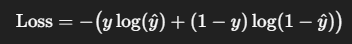

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [17]:
fish=pd.read_csv('https://bit.ly/fish_csv_data')
print(fish.head())
print()
# fish데이터의 Species열에서 고유값 출력
print(pd.unique(fish['Species']))

#fish 데이터에서 Species제외하고 나머지를 선택, 5차원상 분류
# target값으로 문자열 사용 가능(앞장에서는 0,1로 분류)
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
# 아래 처럼 접근해야함 데이터 프레임 이기 때문에
print(fish_input['Weight'][2])
#Species만 선택
fish_target=fish['Species']

train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)

# 표준화 전처리
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

"""
KNN으로 다중 클래스 분류
"""
#k이웃 분류기로 다중 클래스 확률 예측, 5차원 훈련 진행하고 Species 다중 분류(7종류)
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
#target값 저장된 순서
print(kn.classes_)
#예측
print(kn.predict(test_scaled[:5]))
print()

# 예측시 각 클래스별 확률 보여줌,kn.classes_에 저장된 순서대로
proba= kn.predict_proba(test_scaled[:5])
#소수 네 번째 자리까지 표기
print(np.round(proba, decimals=4))

#4번째 샘플만 의미 3:4는
distance, indexes = kn.kneighbors(test_scaled[3:4])
# iloc = 주어진 값을 인덱스로 사용해 행이나 열 선택
# 위에서 4번째 샘플 하나만 넣어서 indexes[0]에 샘플에서 가까운 이웃들 존재
"""
roach 1개, perch 2개가 근접해 있고 proba통해 출력한 결과와 같음 1/3, 2/3
"""
print(train_target.iloc[indexes[0]])


  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
340.0
0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
52     Roach
106    Perch
103    Perch
Name: Species, dtype: object


로지스틱 회귀에서는 선형 방정식을 학습하고 이를 확률로 나타내기 위해 로지스틱 함수(시그모이드 함수)를 사용함 1/(1+e^(-z))
## 로지스틱 회귀로 이진 분류 수행

이진 분류 -> 시그모이드 함수로 z값을 0~1사이 값으로 압축

In [24]:
from sklearn.linear_model import LogisticRegression

char_arr = np.array(['A','B','C','D','E'])
#불리언 인덱싱
print(char_arr[[True,False,True,False,False]])
print(char_arr[char_arr=='A'])
print()

# 도미, 빙어에 대한 행만 골라내기, 익숙해지기, 도미 빙어만 ,True값임
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

lr=LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print()
#각 클래스별 예측 확률 출력
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)
# 학습한 방정식: 각각 weight,length,diagnoal,height,width값이고 마지막은 절편
print(lr.coef_, lr.intercept_)

print()

#양성 클래스(0,1중 1)에 대한 z값 계산
# 위에서 구한 계수, 절편을 가지고 식 만들어서 입력값 넣고 나온 출력값을 나타냄
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
# z값을 시그모이드 함수에 넣어서 확률로 바꿈
from scipy.special import expit
print(expit(decisions))

['A' 'C']
['A']

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]
['Bream' 'Smelt']
[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


## 로지스틱 회귀로 다중 분류 진행

다중 분류 -> 소프트맥스 함수로 모든 확률이 1이 되도록 함

In [36]:
"""
coef_, intercept_ 초기화
↓
z = w^Tx + b
↓
sigmoid(z)
↓
cross entropy 계산
↓
규제항(1/C · ||w||²) 추가
↓
gradient 계산
↓
w, b 업데이트
↓
(max_iter 안에서 수렴할 때까지)

"""
# C = 규제(L2, 작을수록 큐제 커짐,기본1)
# max_iter = 경사 하강법 반복 횟수 최대치
lr=LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
# 7개 생선 데이터로 훈련 진행
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

print()

print(lr.predict(test_scaled[:5]))

print()

print(lr.classes_)
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print()
# intercept=7 -> z를 7개 계산(클래스 마다), 가장 높은 확률 가진게 예측 클래스임
#시그모이드가 아닌 소프트맥스함수를 사용(7개 확률의 합이 1이 되도록)
print(lr.coef_.shape, lr.intercept_.shape)
#각 데이터마다 z값 7개 출력
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))
#소프트맥스 함수로 확률화
from scipy.special import softmax\
# axis= 계산할 축
proba=softmax(decision, axis=1)
print(np.round(proba, decimals=3))

0.9327731092436975
0.925

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

(7, 5) (7,)
[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]
[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
